In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [18]:
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

In [13]:
rd = release_dates
rd = rd[rd.title.str.contains("Christmas")]
rd = rd[rd.country == "USA"]
rd.head()

,title,year,country,date
1237,12 Dog Days of Christmas,2014,USA,2014-11-28
1238,12 Dogs of Christmas: Great Puppy Rescue,2012,USA,2012-10-09
2653,2016 Dancing Dolls a Christmas Story,2017,USA,2017-01-15
6183,A Bad Moms Christmas,2017,USA,2017-11-01
6286,A Belle for Christmas,2014,USA,2014-11-04


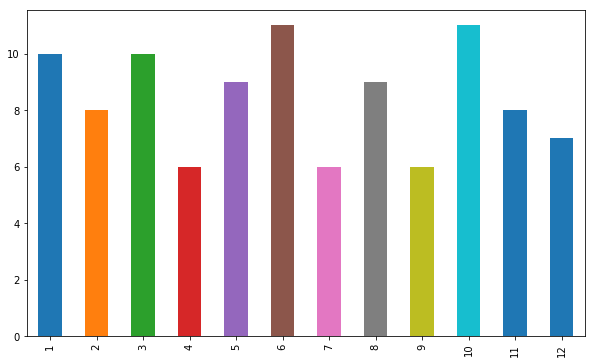

In [39]:
rd.date.dt.month.value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

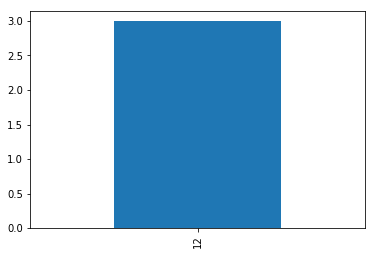

In [17]:
rd = release_dates
rd = rd[rd.country == 'USA']
rd = rd[rd.title.str.startswith('The Hobbit')]
rd.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

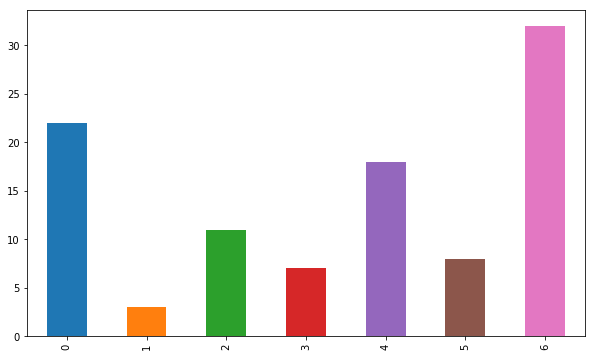

In [45]:
rd = release_dates
rd = rd[rd.country == 'USA']
rd = rd[rd.title.str.contains('Romance')]
rddow = rd.date.dt.dayofweek.value_counts().sort_index()
rddow.plot.bar(figsize=(10, 6))

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

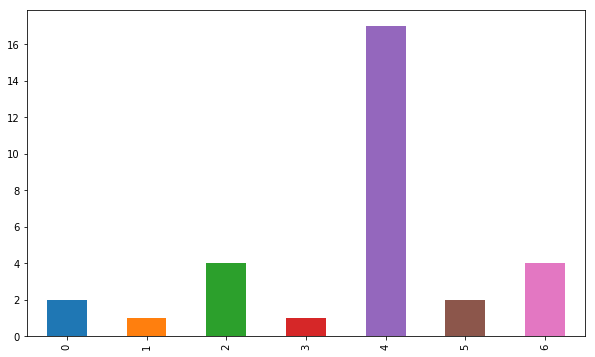

In [46]:
rd = release_dates
rd = rd[rd.country == 'USA']
rd = rd[rd.title.str.contains('Action')]
rddow = rd.date.dt.dayofweek.value_counts().sort_index()
rddow.plot.bar(figsize=(10, 6))

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [55]:
rd = release_dates
rd = rd[rd.country == 'USA']
rd.head()

,title,year,country,date
3,#Captured,2017,USA,2017-09-05
5,#Horror,2015,USA,2015-11-20
7,#Lucky Number,2015,USA,2015-09-01
10,#REALITYHIGH,2017,USA,2017-09-08
15,#Stuck,2014,USA,2014-10-10


In [56]:
c = cast
c = c[c.name == 'Judi Dench']
c = c[c.year // 10 * 10 == 1990]
c.head()

,title,year,name,type,character,n
2814219,GoldenEye,1995,Judi Dench,actress,M,6.0
2814220,Hamlet,1996,Judi Dench,actress,Hecuba,12.0
2814226,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0
2814231,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0
2814244,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0


In [58]:
df = c.merge(rd, on=['title', 'year'])
df.sort_values('date')

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

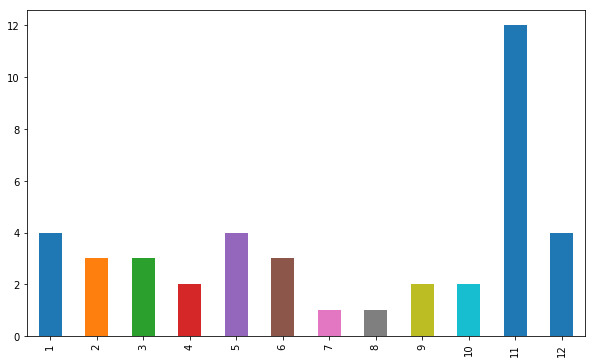

In [62]:
rd = release_dates
rd = rd[rd.country == 'USA']
c = cast
c = c[c.name == 'Judi Dench']
df = c.merge(rd, on=['title', 'year'])
df.date.dt.month.value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

### In which months do films with Tom Cruise tend to be released in the USA?

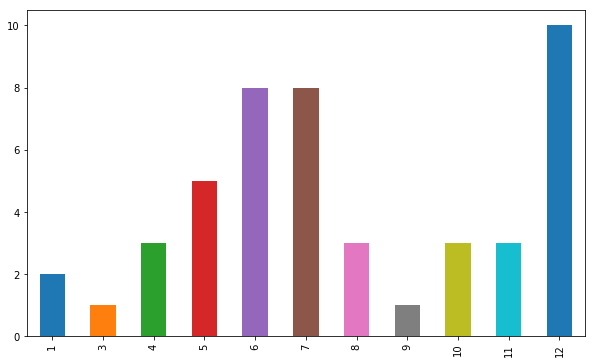

In [64]:
rd = release_dates
rd = rd[rd.country == 'USA']
c = cast
c = c[c.name == 'Tom Cruise']
df = c.merge(rd, on=['title', 'year'])
df.date.dt.month.value_counts().sort_index().plot(kind='bar', figsize=(10, 6))